In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

# 그래디언트 부스팅

## (1) 데이터 구성하기 (목표변수, 설명변수) 

In [2]:
df_raw=pd.read_csv("/Users/lee/Week3/체질검사.csv",engine="python",encoding='cp949')

df_raw_y=df_raw["FAT"]
df_raw_x=df_raw.drop("FAT",axis=1,inplace=False)

## (2) 데이터 분할하기


In [3]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set : 0.981
Score on test set : 0.581


## (3) Parameter = n_estimators

In [4]:
train_score=[];test_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimatros"]=para_n_tree
df_score_n["Trainscore"]=train_score
df_score_n["TestScore"]=test_score

In [5]:
df_score_n.round(3)

,n_estimatros,Trainscore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.586
6,70,0.963,0.587
7,80,0.970,0.581
8,90,0.976,0.582
9,100,0.981,0.581


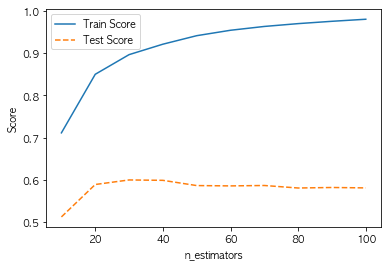

In [6]:
plt.plot(para_n_tree,train_score,linestyle='-',label="Train Score")
plt.plot(para_n_tree,test_score,linestyle='--',label="Test Score")
plt.ylabel("Score");plt.xlabel("n_estimators")
plt.legend()

## (4) Parameter = min_samples_leaf

In [7]:
train_score=[];test_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(min_samples_leaf=v_min_samples_leaf,n_estimators=30,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["Min Samples Leaf"]=para_leaf
df_score_leaf["Trainscore"]=train_score
df_score_leaf["TestScore"]=test_score

In [8]:
df_score_leaf.round(3)

,Min Samples Leaf,Trainscore,TestScore
0,1,0.897,0.600
1,2,0.899,0.599
2,3,0.896,0.594
3,4,0.893,0.586
4,5,0.890,0.604
5,6,0.888,0.596
6,7,0.884,0.590
7,8,0.874,0.610
8,9,0.879,0.598
9,10,0.873,0.587


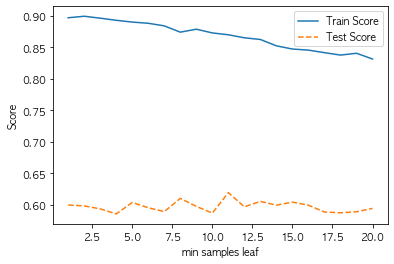

In [9]:
plt.plot(para_leaf,train_score,linestyle='-',label="Train Score")
plt.plot(para_leaf,test_score,linestyle='--',label="Test Score")
plt.ylabel("Score");plt.xlabel("min samples leaf")
plt.legend()

## (5) Parameter = min_samples_split

In [10]:
train_score=[];test_score=[]
para_split=[n_split*2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(min_samples_split=v_min_samples_split,n_estimators=30,random_state=1234,min_samples_leaf=11)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_split = pd.DataFrame()
df_score_split["Min Samples split"]=para_split
df_score_split["Trainscore"]=train_score
df_score_split["TestScore"]=test_score

In [11]:
df_score_split.round(3)

,Min Samples split,Trainscore,TestScore
0,2,0.870,0.620
1,4,0.870,0.620
2,6,0.870,0.620
3,8,0.870,0.620
4,10,0.870,0.620
5,12,0.870,0.620
6,14,0.870,0.620
7,16,0.870,0.620
8,18,0.870,0.620
9,20,0.870,0.620


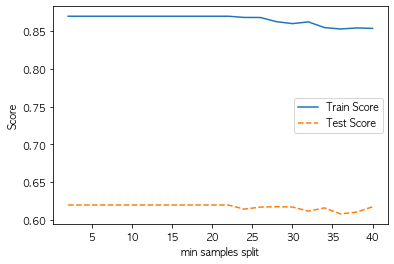

In [12]:
plt.plot(para_split,train_score,linestyle='-',label="Train Score")
plt.plot(para_split,test_score,linestyle='--',label="Test Score")
plt.ylabel("Score");plt.xlabel("min samples split")
plt.legend()

## (6) Parameter = max_depth

In [13]:
train_score=[];test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(max_depth=v_max_depth,min_samples_split=22,n_estimators=30,random_state=1234,min_samples_leaf=11)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Min Samples depth"]=para_depth
df_score_depth["Trainscore"]=train_score
df_score_depth["TestScore"]=test_score

In [14]:
df_score_depth.round(3)

,Min Samples depth,Trainscore,TestScore
0,1,0.703,0.592
1,2,0.800,0.600
2,3,0.870,0.620
3,4,0.900,0.629
4,5,0.913,0.613
5,6,0.917,0.614
6,7,0.920,0.613
7,8,0.920,0.615
8,9,0.921,0.609
9,10,0.922,0.616


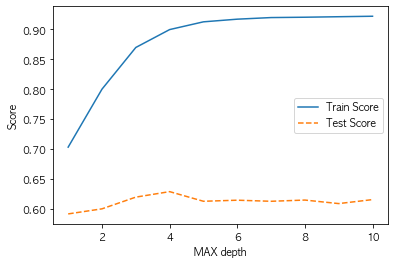

In [15]:
plt.plot(para_depth,train_score,linestyle='-',label="Train Score")
plt.plot(para_depth,test_score,linestyle='--',label="Test Score")
plt.ylabel("Score");plt.xlabel("MAX depth")
plt.legend()

## (7) parameter = learning_rate

In [16]:
train_score=[];test_score=[]
para_lr=[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(learning_rate=v_learning_rate,max_depth=4
                                   ,min_samples_split=22,n_estimators=30,
                                   random_state=1234,min_samples_leaf=11)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_lr = pd.DataFrame()
df_score_lr["Learning Rate"]=para_lr
df_score_lr["Trainscore"]=train_score
df_score_lr["TestScore"]=test_score

In [17]:
df_score_lr.round(3)

,Learning Rate,Trainscore,TestScore
0,0.1,0.900,0.629
1,0.2,0.940,0.588
2,0.3,0.966,0.566
3,0.4,0.981,0.539
4,0.5,0.984,0.533
5,0.6,0.990,0.527
6,0.7,0.993,0.478
7,0.8,0.994,0.437
8,0.9,0.997,0.464


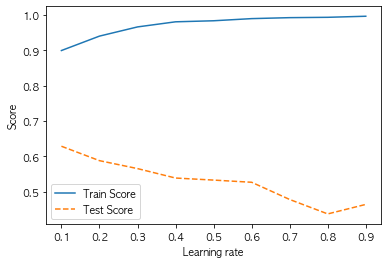

In [18]:
plt.plot(para_lr,train_score,linestyle='-',label="Train Score")
plt.plot(para_lr,test_score,linestyle='--',label="Test Score")
plt.ylabel("Score");plt.xlabel("Learning rate")
plt.legend()

## (8) 최종모델선정

In [19]:
gb_final = GradientBoostingRegressor(random_state=1234,n_estimators=30,min_samples_leaf=11,
                                    min_samples_split=22,max_depth=4,learning_rate=0.1)
gb_final.fit(df_train_x,df_train_y)

print("Score on training set : {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Score on training set : 0.900
Score on test set : 0.629


## (9) 최종 모델 트리 시각화 및 해석

In [20]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.775
2,HEIGHT,0.038
12,WRIST,0.025
3,NECK,0.023
6,HIP,0.021
4,CHEST,0.021
0,AGE,0.021
7,THIGH,0.020
8,KNEE,0.017
10,BICEPS,0.014


Text(0, 0.5, '변수')

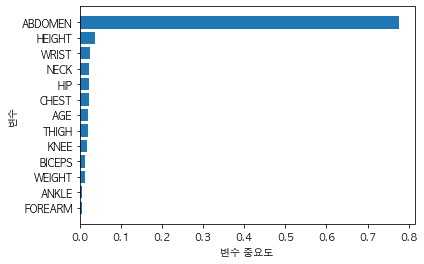

In [21]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## (10) GridsearchCV 최적 Parameter 찾기

In [22]:
# estimator=GradientBoostingRegressor(random_state=1234)

# param_grid={"criterion":["mse","friedman_mse","mae"],"max_features":["auto","sqrt","log2"],"learning_rate":para_lr,"max_depth":para_depth,"min_sample_leaf":para_leaf}
# grid_gb=GridSearchCV(estimator,param_grid,scoring='r2',n_jobs=-1)
# grid_gb.fit(df_train_x,df_train_y)

# print('best Estimator model:\n{}'.format(grid_gb.best_estimator_))
# print('\nbest parameter:\n{}'.format(grid_gb.best_params_))
# print('\nbest best score:\n{}'.format(grid_gb.best_score_.round(3)))